**Roujia Zhong & Luhang Sun**

Fall 2020

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

## Goal

**Make sure any debug printouts do not appear if `verbose=False`!**

This week, you will test your CNN on the STL-10 dataset! The last step before you can do this is implementing an optimizer to update your network weights during gradient descent. You will implement a few and compare them.

## Task 5: Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. You will implement 3 popular algorithms:

- `SGD` (stochastic gradient descent)
- `SGD_Momentum` (stochastic gradient descent with momentum)
- `Adam` (Adaptive Moment Estimation)

Implement each of these according to the update equations (the `update_weights()` in each subclass in `optimizer.py`). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$m_{t} = \beta_1 \times m_{t-1} + (1 - \beta_1)\times dw$

$v_{t} = \beta_2 \times v_{t-1} + (1 - \beta_2)\times dw^2$

$n = m_{t} / \left (1-(\beta_1^t) \right )$

$u = v_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times n \right ) / \left ( \sqrt(u) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $m$ and $v$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $n$ and $u$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 

In [2]:
from optimizer import *

####  Test SGD

In [7]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

####  Test SGD_Momentum

In [9]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

####  Test Adam

In [11]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Task 6: Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`

## Task 7: Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-based neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10 to perform the overfitting test.

### 7a. Move `load_stl10_dataset` and `preprocess_data.py` from the MLP project

Make the one following change in `preprocess_data.py`:

- In `preprocess_stl`, Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)
- In `load_stl10`, add an optional parameter to the function `scale_fact=3`, which specifies the factor by which to downscale the STL-10 images. The default (`scale_fact=3`) reduces the resolution from 96x96 to 32x32. Achieve this downscaling by passing along the optional parameter value when the `load` function in `load_stl10_dataset.py`.

In [4]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

### 7b. Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Note:** The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [12]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=6)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4578, 3, 16, 16)
Train labels shape:  (4578,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (20, 3, 16, 16)
dev labels shape:  (20,)


### 7c. Train and overfit the network on a small STL-10 sample with each optimizer

#### Goal

If your network works, you should see a drop in loss over epochs to 0 from the initial value of ~2.3.

#### Todo

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer (i.e. each net uses a different optimizer).
- Train each on the **dev** set and validate on the tiny validation set (we don't care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

#### Guidelines

- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~15 mins on my laptop.

#### Caveat emptor

Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours.

- Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss.
- Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction.

In [29]:
# Adam
# create ConvNet networks
net1 = ConvNet4(input_shape=(3, 16, 16), wt_scale=1e-2, reg=1e-2, verbose=False)
#compile with Adam optimizer
net1.compile('adam', lr=1e-2)
#Train on the dev set
adam_l, adam_val_acc, adam_train_acc = net1.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=10, n_epochs=200, acc_freq=20, print_every=50)

Starting to train...
400 iterations. 2 iter/epoch.
iteration 1: 5.4s
total predicted time: 2159.914
--------------------
iter # 20, train_acc: 0.8, val_acc: 0.0
iter # 40, train_acc: 1.0, val_acc: 0.5
iter # 50, loss: 0.66705
iter # 60, train_acc: 1.0, val_acc: 0.5
iter # 80, train_acc: 1.0, val_acc: 0.0
iter # 100, loss: 0.72323
iter # 100, train_acc: 1.0, val_acc: 0.0
iter # 120, train_acc: 1.0, val_acc: 0.5
iter # 140, train_acc: 0.95, val_acc: 0.0
iter # 150, loss: 0.96699
iter # 160, train_acc: 1.0, val_acc: 0.5
iter # 180, train_acc: 1.0, val_acc: 0.0
iter # 200, loss: 0.22849
iter # 200, train_acc: 1.0, val_acc: 0.0
iter # 220, train_acc: 0.95, val_acc: 0.0
iter # 240, train_acc: 1.0, val_acc: 0.0
iter # 250, loss: 0.20855
iter # 260, train_acc: 1.0, val_acc: 0.0
iter # 280, train_acc: 1.0, val_acc: 0.0
iter # 300, loss: 0.13144
iter # 300, train_acc: 1.0, val_acc: 0.0
iter # 320, train_acc: 1.0, val_acc: 0.0
iter # 340, train_acc: 1.0, val_acc: 0.0
iter # 350, loss: 0.12834
ite

In [24]:
# SGD-M
# create ConvNet networks
net2 = ConvNet4(input_shape=(3, 16, 16), wt_scale=1e-2, reg=1e-2)
#compile with SGD-M optimizer
net2.compile('sgd_momentum', lr=1e-2)
#Train on the dev set
sgdm_l, sgdm_val_acc, sgdm_train_acc = net2.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=10, n_epochs=200, acc_freq=20, print_every=50)

Starting to train...
400 iterations. 2 iter/epoch.
iteration 1: 0.032s
total predicted time: 12.936
--------------------
iter # 20, train_acc: 0.25, val_acc: 0.5
iter # 40, train_acc: 0.25, val_acc: 0.5
iter # 50, loss: 2.28181
iter # 60, train_acc: 0.25, val_acc: 0.5
iter # 80, train_acc: 0.25, val_acc: 0.5
iter # 100, loss: 2.05495
iter # 100, train_acc: 0.25, val_acc: 0.5
iter # 120, train_acc: 0.45, val_acc: 0.0
iter # 140, train_acc: 0.55, val_acc: 0.5
iter # 150, loss: 1.24775
iter # 160, train_acc: 0.7, val_acc: 0.5
iter # 180, train_acc: 0.95, val_acc: 0.5
iter # 200, loss: 0.30659
iter # 200, train_acc: 0.95, val_acc: 0.5
iter # 220, train_acc: 1.0, val_acc: 0.5
iter # 240, train_acc: 1.0, val_acc: 0.5
iter # 250, loss: 0.21356
iter # 260, train_acc: 1.0, val_acc: 0.5
iter # 280, train_acc: 1.0, val_acc: 0.5
iter # 300, loss: 0.1871
iter # 300, train_acc: 1.0, val_acc: 0.5
iter # 320, train_acc: 1.0, val_acc: 0.5
iter # 340, train_acc: 1.0, val_acc: 0.5
iter # 350, loss: 0.184

In [25]:
# SGD
# create ConvNet networks
net3 = ConvNet4(input_shape=(3, 16, 16), wt_scale=1e-2, reg=1e-2)
#compile with SGD compiler
net3.compile('sgd', lr=1e-2)
#Train on the dev set
sgd_l, sgd_val_acc, sgd_train_acc = net3.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=10, n_epochs=200, acc_freq=20, print_every=50)

Starting to train...
400 iterations. 2 iter/epoch.
iteration 1: 0.026s
total predicted time: 10.463
--------------------
iter # 20, train_acc: 0.25, val_acc: 0.5
iter # 40, train_acc: 0.25, val_acc: 0.5
iter # 50, loss: 2.37209
iter # 60, train_acc: 0.25, val_acc: 0.5
iter # 80, train_acc: 0.25, val_acc: 0.5
iter # 100, loss: 2.34872
iter # 100, train_acc: 0.25, val_acc: 0.5
iter # 120, train_acc: 0.25, val_acc: 0.5
iter # 140, train_acc: 0.25, val_acc: 0.5
iter # 150, loss: 2.35352
iter # 160, train_acc: 0.25, val_acc: 0.5
iter # 180, train_acc: 0.25, val_acc: 0.5
iter # 200, loss: 2.30228
iter # 200, train_acc: 0.25, val_acc: 0.5
iter # 220, train_acc: 0.25, val_acc: 0.5
iter # 240, train_acc: 0.25, val_acc: 0.5
iter # 250, loss: 2.34783
iter # 260, train_acc: 0.25, val_acc: 0.5
iter # 280, train_acc: 0.25, val_acc: 0.5
iter # 300, loss: 2.28266
iter # 300, train_acc: 0.25, val_acc: 0.5
iter # 320, train_acc: 0.25, val_acc: 0.5
iter # 340, train_acc: 0.25, val_acc: 0.5
iter # 350, lo

### 7d. Evaluate and plot the different optimizer results

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

In [22]:
def plot_nets_train(nets, loss_lists, acc_lists, net_names, plotMarkers=False):
    '''
    Parameters:
    -----------
    nets: Python list of network objects. len(nets) = num_nets.
    loss_lists: Python lists of ndarrays. len(loss_lists) = num_nets. len(loss_lists[0]) = n_epochs.
        This would be a list of the loss histories for each of the nets being plotted.
    acc_lists: Python lists of ndarrays. len(acc_lists) = num_nets. len(acc_lists[0]) = n_epochs.
        This would be a list of the accuracy histories for each of the nets being plotted.
    net_names: Python list of str. len(net_names) = num_nets.
        Identifying names of each net (e.g. for legend).
    plotMarkers: boolean.
        Should we draw a plot marker at each epoch on each curve?
        '''
    n_nets = len(nets)
    n_epochs = len(acc_lists[0])
    n_iteration = len(loss_lists[0])
    
    colors = ['orange', 'blue', 'red']
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{n_nets} networks trained for (100 epochs) and ({n_iteration} iterations)')
    
    for net, loss_list, acc_list, color in zip(nets, loss_lists, acc_lists, colors):
        x = np.arange(1, n_epochs+1)
        x_2 = np.arange(1, n_iteration + 1)
        curveStr = '-r'
        if plotMarkers:
            curveStr += 'o'

        ax1.plot(x_2, loss_list, curveStr, c=color)
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Loss')
        ax2.plot(x*4, np.array(acc_list), curveStr, c=color)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
    
    plt.legend(net_names)
#     plt.yticks(np.arange(0, 1, 0.05))
    plt.show()

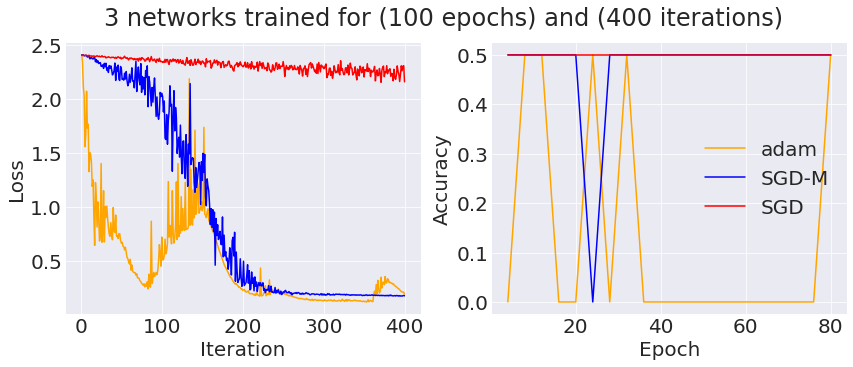

In [31]:
nets = [net1, net2, net3]
loss_list = [adam_l, sgdm_l, sgd_l]
val_acc = [adam_val_acc, sgdm_val_acc, sgd_val_acc]
net_names = ["adam", "SGD-M", "SGD"]
plot_nets_train(nets, loss_list, val_acc, net_names)

### 7e. Questions

**Question 3**: Why does decreasing the mini-batch size make the loss print-outs more erratic in Task 7c?

**Question 4**: Which optimizer works best and why do think it is best?

**Question 5**: What is happening with the training set accuracy and why?

**Answer 3:** The program randomly chooses samples to be in each mini-batch. When the mini-batch size is smaller, there are fewer overlaps in the samples that are selected in each batch. The performance of the network becomes unstable when it keeps identifying very different samples.

**Answer 4:** The Adam optimizer the fastest but SGD-M seems to yield a slightly lower loss with 200 epochs without the back-and-forth instability like Adam. 

**Answer 5:** The training set accuracy is either 0 or 0.5. This is because there are only two samples in the validation set. We get 0 when none of the samples is classified correctly and 0.5 when 1 of the samples is classified correctly.

## Task 8: Training your convolutional neural network on STL-10

### 8a. Load in STL-10 at 32x32 resolution

In [5]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4398, 3, 32, 32)
Train labels shape:  (4398,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (200, 3, 32, 32)
Validation labels shape:  (200,)
dev data shape:  (2, 3, 32, 32)
dev labels shape:  (2,)


### 8b. Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=20) in a reasonable amount of time. The training set is N=4000, how will we ever manage to process that amount of data?!

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython` (or `pip3 install cython --user` if working in Davis 102)
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder.
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPooling2D` layers with `Conv2DAccel` and `MaxPooling2DAccel`.

### 8c. Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve 45% accuracy on the test and/or validation set.

#### Notes

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [6]:
from network import ConvNet4Accel

In [89]:
# fit the network using adam and test on validation set
net_accel_adam = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, reg=1e-2)
net_accel_adam.compile('adam', lr=1e-4)
loss_a, val_acc_a, train_acc_a = net_accel_adam.fit(x_train, y_train, x_val, y_val, mini_batch_sz=100, n_epochs=100, acc_freq=43, print_every=100)

Starting to train...
4300 iterations. 43 iter/epoch.
iteration 1: 0.988s
total predicted time: 4248.822
--------------------
iter # 43, train_acc: 0.172, val_acc: 0.175
iter # 86, train_acc: 0.252, val_acc: 0.24
iteration # 100, loss: 2.23636
iter # 129, train_acc: 0.292, val_acc: 0.255
iter # 172, train_acc: 0.33, val_acc: 0.285
iteration # 200, loss: 2.03059
iter # 215, train_acc: 0.356, val_acc: 0.265
iter # 258, train_acc: 0.346, val_acc: 0.275
iteration # 300, loss: 1.7781
iter # 301, train_acc: 0.344, val_acc: 0.285
iter # 344, train_acc: 0.4, val_acc: 0.305
iter # 387, train_acc: 0.416, val_acc: 0.31
iteration # 400, loss: 1.6998
iter # 430, train_acc: 0.374, val_acc: 0.31
iter # 473, train_acc: 0.41, val_acc: 0.315
iteration # 500, loss: 1.84871
iter # 516, train_acc: 0.426, val_acc: 0.3
iter # 559, train_acc: 0.4, val_acc: 0.345
iteration # 600, loss: 1.79754
iter # 602, train_acc: 0.398, val_acc: 0.375
iter # 645, train_acc: 0.458, val_acc: 0.345
iter # 688, train_acc: 0.424,

In [91]:
# keep training for 5 more epochs
l, v_a, t_a = net_accel_adam.fit(x_train, y_train, x_val, y_val, mini_batch_sz=100, n_epochs=5, acc_freq=43, print_every=100)

# test set accuracy
net_accel_adam.accuracy(x_test, y_test)

Starting to train...
215 iterations. 43 iter/epoch.
iteration 1: 0.961s
total predicted time: 206.691
--------------------
iter # 43, train_acc: 0.778, val_acc: 0.445
iter # 86, train_acc: 0.754, val_acc: 0.48
iteration # 100, loss: 1.25247
iter # 129, train_acc: 0.764, val_acc: 0.465
iter # 172, train_acc: 0.772, val_acc: 0.44
iteration # 200, loss: 1.10792
iter # 215, train_acc: 0.76, val_acc: 0.49
final acc:  0.49


0.47

### 8d. Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

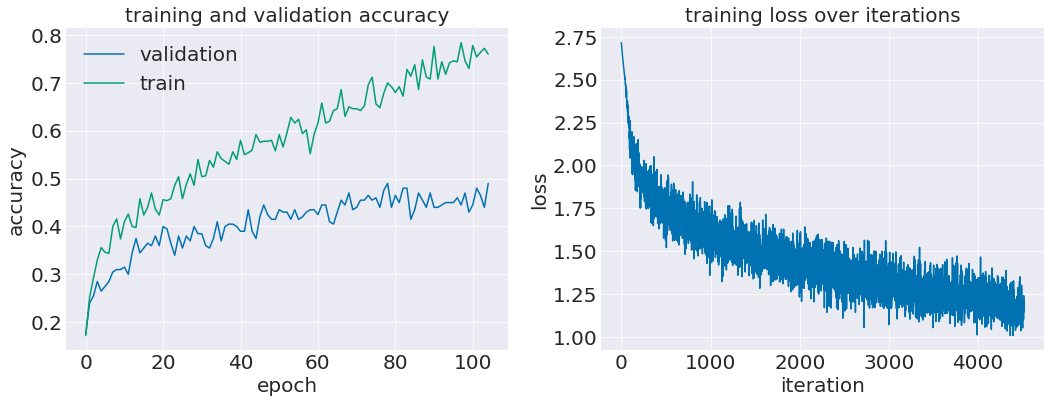

In [92]:
# concatenate results from Adam
acc_val = val_acc_a + v_a
acc_train = train_acc_a + t_a
loss_adam = loss_a + l

fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.plot(np.arange(len(acc_val)), acc_val, label="validation")
ax1.plot(np.arange(len(acc_train)), acc_train, label="train")
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")
ax1.set_title("training and validation accuracy", size=20)
ax1.legend()

ax2.plot(np.arange(len(loss_adam)), loss_adam)
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")
ax2.set_title("training loss over iterations", size=20)
plt.tight_layout()
plt.show()

### 8e. Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [46]:
def plot_weights(wts, saveFig=False, filename='convWts_adam_overfit.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    if saveFig:
        plt.savefig('convWts_adam_overfit.png')
    plt.show()

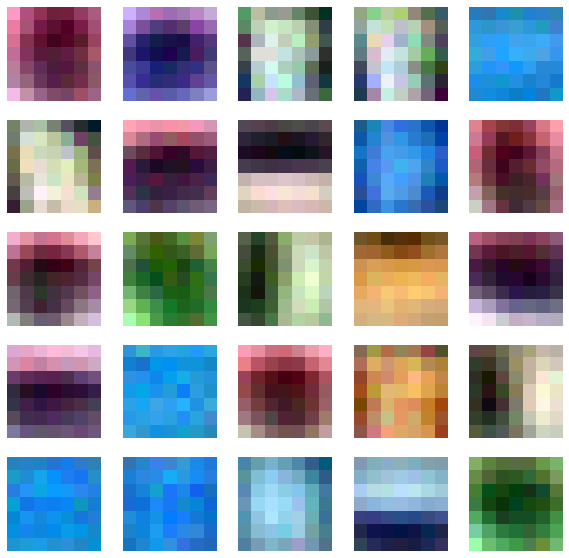

In [93]:
# weights in Adam
# Every weight should not look like RGB noise
plot_weights(net_accel_adam.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

### 8f. Questions

**Question 6:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

#### Note

You should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

**Answer 6:** They capture patterns in colors and edges. Yes it makes sense because we are visualizing weights from the first layer, which essentially captures patterns in foundamental elements of the image, such as color groups and edges. 

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this.

*We first trained the networking using Adam for mini_batch_sz = 20 and n_epochs=150, and found out that Adam overfits very quickly at about epoch #80, after that the loss starts to increase, where we got a loss curve that looks like y=$x^2$. So we decreased the number of epochs and increased the batch size to lower the number of iterations.*

In [34]:
# I first trained the network for 20 epochs
# note that I used x_test as the validation set in fit()
net_accel_adam2 = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, reg=1e-2)
net_accel_adam2.compile('adam', lr=1e-3)
loss2, test_acc2, train_acc2 = net_accel_adam2.fit(x_train, y_train, x_test, y_test, mini_batch_sz=100, n_epochs=20, acc_freq=43, print_every=146)

Starting to train...
860 iterations. 43 iter/epoch.
iteration 1: 1.161s
total predicted time: 998.535
--------------------
iter # 43, train_acc: 0.322, val_acc: 0.285
iter # 86, train_acc: 0.358, val_acc: 0.325
iter # 129, train_acc: 0.392, val_acc: 0.325
iter # 146, loss: 1.83085
iter # 172, train_acc: 0.442, val_acc: 0.35
iter # 215, train_acc: 0.442, val_acc: 0.395
iter # 258, train_acc: 0.498, val_acc: 0.38
iter # 292, loss: 1.7243
iter # 301, train_acc: 0.506, val_acc: 0.36
iter # 344, train_acc: 0.472, val_acc: 0.385
iter # 387, train_acc: 0.54, val_acc: 0.41
iter # 430, train_acc: 0.506, val_acc: 0.39
iter # 438, loss: 1.38708
iter # 473, train_acc: 0.572, val_acc: 0.42
iter # 516, train_acc: 0.55, val_acc: 0.425
iter # 559, train_acc: 0.572, val_acc: 0.43
iter # 584, loss: 1.45306
iter # 602, train_acc: 0.568, val_acc: 0.445
iter # 645, train_acc: 0.61, val_acc: 0.43
iter # 688, train_acc: 0.648, val_acc: 0.42
iter # 730, loss: 1.35436
iter # 731, train_acc: 0.672, val_acc: 0.4

In [35]:
# it looks like the network above hasn't converged yet, so I repeated the training process for 20 more epochs
# the accuracy on x_test reached 50%+ at iter #430, which is 10 more epochs, so I cut the training
loss3, test_acc3, train_acc3 = net_accel_adam2.fit(x_train, y_train, x_test, y_test, mini_batch_sz=100, n_epochs=20, acc_freq=43, print_every=146)

Starting to train...
860 iterations. 43 iter/epoch.
iteration 1: 0.914s
total predicted time: 786.053
--------------------
iter # 43, train_acc: 0.694, val_acc: 0.4625
iter # 86, train_acc: 0.666, val_acc: 0.4775
iter # 129, train_acc: 0.726, val_acc: 0.465
iter # 146, loss: 1.46953
iter # 172, train_acc: 0.736, val_acc: 0.4975
iter # 215, train_acc: 0.748, val_acc: 0.5175
iter # 258, train_acc: 0.738, val_acc: 0.5225
iter # 292, loss: 1.28347
iter # 301, train_acc: 0.758, val_acc: 0.485
iter # 344, train_acc: 0.762, val_acc: 0.495
iter # 387, train_acc: 0.788, val_acc: 0.4775
iter # 430, train_acc: 0.832, val_acc: 0.5375
iter # 438, loss: 1.23218


KeyboardInterrupt: 

The hyperparameters that reached this accuracy are:

    mini_batch_sz = 100
    n_epochs = 20 + 10 = 30
    wt_scale = 1e-2
    reg = 1e-2
    learning_rate = 1e-3 

### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss? 

### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

###  3. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy. 

### 4. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

*We researched into 3 other optimizers, AdaGrad, RMSprop and NAG, and implemented AdaGrad and RMSprop from skretch, both of which are adaptive gradient optimizers that differentiates learning rates for different weights like Adam. NAG is a more advanced algorithm we found very challenging to fit into our project structure, as it also needs info of the previous weights, we briefly explained it at the end.*

*To make the training take reasonable amount time we used x_test (400 samples) as the training set and x_val (200 samples) as the test set. We are comparing both the performance on loss/accuracy curve and the time efficiency with Adam, as all three optimizers implement the idea of moving average and different learning rates.*

**1) Adaptive gradient (AdaGrad):** It implements the idea of smaller learning rates for frequently-updated gradients and larger learning rates for infrequently-updated gradients. AdaGrad divides the learning rate by the square root of v, which is the cumulative sum of current and past squared gradients. AdaGrad came out early than Adam therefore is not as advanced or computationally efficient as Adam. It is well suited though when we have sparse data as in large scale neural networks

In [125]:
import time

start = time.time()
net_adagrad = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, reg=1e-2)
net_adagrad.compile('adagrad')
loss_ada, val_acc_ada, train_acc_ada = net_adagrad.fit(x_test, y_test, x_val, y_val, mini_batch_sz=100, n_epochs=50, acc_freq=4, print_every=100)
print(f"total time taken {round(time.time()-start)} s")

Starting to train...
200 iterations. 4 iter/epoch.
iteration 1: 1.069s
total predicted time: 213.893
--------------------
iter # 4, train_acc: 0.1525, val_acc: 0.155
iter # 8, train_acc: 0.2225, val_acc: 0.205
iter # 12, train_acc: 0.215, val_acc: 0.195
iter # 16, train_acc: 0.2475, val_acc: 0.195
iter # 20, train_acc: 0.24, val_acc: 0.17
iter # 24, train_acc: 0.2525, val_acc: 0.19
iter # 28, train_acc: 0.2925, val_acc: 0.18
iter # 32, train_acc: 0.32, val_acc: 0.21
iter # 36, train_acc: 0.32, val_acc: 0.225
iter # 40, train_acc: 0.295, val_acc: 0.23
iter # 44, train_acc: 0.315, val_acc: 0.205
iter # 48, train_acc: 0.34, val_acc: 0.215
iter # 52, train_acc: 0.335, val_acc: 0.2
iter # 56, train_acc: 0.36, val_acc: 0.235
iter # 60, train_acc: 0.3425, val_acc: 0.2
iter # 64, train_acc: 0.385, val_acc: 0.22
iter # 68, train_acc: 0.3875, val_acc: 0.235
iter # 72, train_acc: 0.4125, val_acc: 0.265
iter # 76, train_acc: 0.4275, val_acc: 0.25
iter # 80, train_acc: 0.4275, val_acc: 0.255
iter #

**2) RMSprop:** This is the Root Mean Square propagation devised by Geoffrey Hinton and tries to resolvee Adagrad’s radically diminishing learning rates by using a moving average of the squared gradient. It utilizes the magnitude of the recent gradient descents to normalize the gradient. RMSProp divides the learning rate by the average of the exponential decay of squared gradients. It advances further similar to Adam by including beta to make the influence of past info and current info different. 

In [126]:
start = time.time()
net_rms = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, reg=1e-2)
net_rms.compile('rmsprop')
loss_rms, val_acc_rms, train_acc_rms = net_rms.fit(x_test, y_test, x_val, y_val, mini_batch_sz=100, n_epochs=50, acc_freq=4, print_every=100)
print(f"total time taken {round(time.time()-start)} s")

Starting to train...
200 iterations. 4 iter/epoch.
iteration 1: 1.077s
total predicted time: 215.325
--------------------
iter # 4, train_acc: 0.1125, val_acc: 0.12
iter # 8, train_acc: 0.1125, val_acc: 0.12
iter # 12, train_acc: 0.19, val_acc: 0.165
iter # 16, train_acc: 0.2225, val_acc: 0.165
iter # 20, train_acc: 0.23, val_acc: 0.16
iter # 24, train_acc: 0.2975, val_acc: 0.23
iter # 28, train_acc: 0.2575, val_acc: 0.2
iter # 32, train_acc: 0.3425, val_acc: 0.21
iter # 36, train_acc: 0.3325, val_acc: 0.2
iter # 40, train_acc: 0.405, val_acc: 0.275
iter # 44, train_acc: 0.325, val_acc: 0.225
iter # 48, train_acc: 0.39, val_acc: 0.26
iter # 52, train_acc: 0.4025, val_acc: 0.27
iter # 56, train_acc: 0.44, val_acc: 0.265
iter # 60, train_acc: 0.395, val_acc: 0.245
iter # 64, train_acc: 0.52, val_acc: 0.31
iter # 68, train_acc: 0.47, val_acc: 0.29
iter # 72, train_acc: 0.45, val_acc: 0.295
iter # 76, train_acc: 0.45, val_acc: 0.27
iter # 80, train_acc: 0.555, val_acc: 0.315
iter # 84, tra

In [127]:
# comparison group with Adam with the same parameter
start = time.time()
net_adam = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, reg=1e-2)
net_adam.compile('adam')
loss_adam, val_acc_adam, train_acc_adam = net_adam.fit(x_test, y_test, x_val, y_val, mini_batch_sz=100, n_epochs=50, acc_freq=4, print_every=100)
print(f"total time taken {round(time.time()-start)} s")

Starting to train...
200 iterations. 4 iter/epoch.
iteration 1: 1.133s
total predicted time: 226.505
--------------------
iter # 4, train_acc: 0.205, val_acc: 0.135
iter # 8, train_acc: 0.23, val_acc: 0.175
iter # 12, train_acc: 0.2375, val_acc: 0.175
iter # 16, train_acc: 0.295, val_acc: 0.19
iter # 20, train_acc: 0.3175, val_acc: 0.23
iter # 24, train_acc: 0.3875, val_acc: 0.275
iter # 28, train_acc: 0.385, val_acc: 0.245
iter # 32, train_acc: 0.3975, val_acc: 0.24
iter # 36, train_acc: 0.4375, val_acc: 0.245
iter # 40, train_acc: 0.5125, val_acc: 0.28
iter # 44, train_acc: 0.505, val_acc: 0.26
iter # 48, train_acc: 0.5075, val_acc: 0.295
iter # 52, train_acc: 0.5975, val_acc: 0.255
iter # 56, train_acc: 0.6, val_acc: 0.27
iter # 60, train_acc: 0.64, val_acc: 0.295
iter # 64, train_acc: 0.625, val_acc: 0.26
iter # 68, train_acc: 0.68, val_acc: 0.305
iter # 72, train_acc: 0.72, val_acc: 0.285
iter # 76, train_acc: 0.715, val_acc: 0.23
iter # 80, train_acc: 0.74, val_acc: 0.24
iter # 8

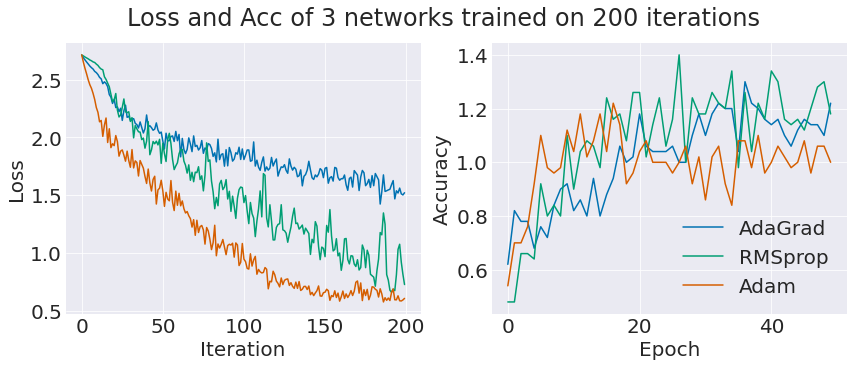

In [147]:
nets = [net_adagrad, net_rms, net_adam]
net_names = ["AdaGrad", "RMSprop", "Adam"]
acc_lists = [val_acc_ada, val_acc_rms, val_acc_adam]
loss_lists = [loss_ada, loss_rms, loss_adam]
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5))
fig.suptitle("Loss and Acc of 3 networks trained on 200 iterations")

for net, loss_list, acc_list in zip(nets, loss_lists, acc_lists):
    ax1.plot(np.arange(len(loss_list)), loss_list)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')
    
    ax2.plot(np.arange(len(acc_list)), np.array(acc_list)*4)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')

plt.legend(net_names)
plt.show()

*The result is consistent with what we expected - AdaGrad has the highest loss, RMSprop impoved the algorithm of AdaGrad and Adam is the most advanced one that generates the lowest loss overall. Their accuracies, however, did not differ much in this training with 50 epochs, nor did their training time.*

*We also found out that for Adam not to have the extreme high loss in the middle of declining trend as shown in the graph of Task 7, we need to lower to the learning rate*

**3) Nesterov Accelerated Gradient (NAG):** NAG is a more robust version than SGD-M because it not only updates the weights with the current gradient but also look ahead to the future step. So the algorithm has a better idea of when to stop on the loss curve. It evaluates the gradient of the looked ahead and based on the importance then update the weights. In this way, we can optimize the descent faster and it works slightly better than SGD-M. Like SGD-M, NAG uses the same learning rate across all the weights. However, this is hard to implement into our project structure because it needs us to save the previous weights from the previous weight update and therefore modify some structures of the optimizer object.

*References: https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3*

### 5. Optimize your algorithms

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

### 6. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

### 7. Additional datasets

Do classification and analyxe the results with an image dataset of your choice.

### 8. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.

*First we tested the overall running time on the 4-layer network in the base project with accelerator and without accelerator, with a small epoch = 5, using x_test (32x32, 400 samples) as the input and x_validation (200 samples) as the validation set. All other hyperparameters are the same. The fit() method has a print out 

In [11]:
import time
start = time.time()
net_adam_accel = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, reg=1e-2)
net_adam_accel.compile('adam', lr=1e-3)
loss_accel, test_acc_accel, train_acc_accel = net_adam_accel.fit(x_test, y_test, x_val, y_val, mini_batch_sz=100, n_epochs=5, acc_freq=4, print_every=20, verbose=False)
print(f'time taken to train accelerated network: {round(time.time()-start, 5)} s')

start = time.time()
net_adam_reg = ConvNet4(input_shape=(3, 32, 32), wt_scale=1e-2, reg=1e-2)
net_adam_reg.compile('adam', lr=1e-3)
loss_reg, test_acc_reg, train_acc_reg = net_adam_reg.fit(x_test, y_test, x_val, y_val, mini_batch_sz=100, n_epochs=5, acc_freq=4, print_every=20, verbose=False)
print(f'time taken to train non-accelerated network: {round(time.time()-start, 5)} s')

Starting to train...
20 iterations. 4 iter/epoch.
iteration 1: 1.011s
total predicted time: 20.216
--------------------
iteration # 20, loss: 1.9833992069473643
final acc:  0.22
time taken to train accelerated network: 24.542 s
Starting to train...
20 iterations. 4 iter/epoch.
iteration 1: 81.448s
total predicted time: 1628.961
--------------------
iteration # 20, loss: 2.0908992810995115
final acc:  0.2
time taken to train non-accelerated network: 2948.69036 s
